In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
fig_width = 10
%matplotlib inline



## Theory: brownian motion


In [2]:
np.random.seed(42)
sigma = 1.
N_trials = 100
N_time= 500

time = np.arange(N_time)
x = np.cumsum( np.random.randn(N_time, N_trials) * sigma , axis=0)#/ np.sqrt(1+time)

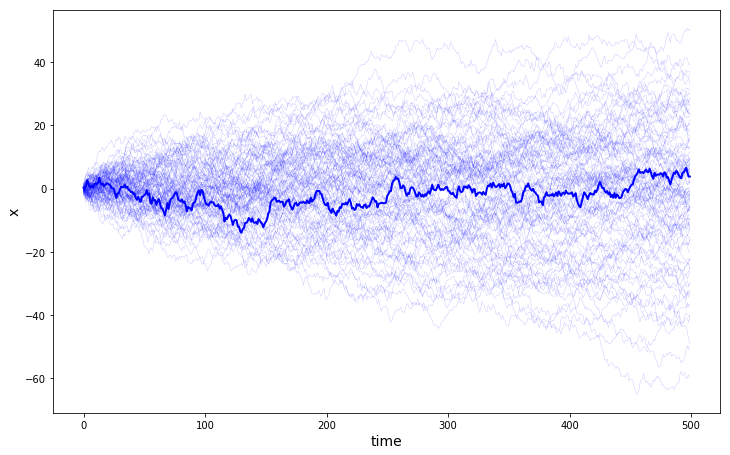

In [3]:
i_sample = np.random.randint(N_trials)
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, x, c='b', lw=.5, alpha=.2)
_ = ax.plot(time, x[:, i_sample], c='b', lw=2, alpha=1.)
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('x', fontsize=14)
#ax.set_ylim(-.05, 1.05)
ax.set_xlabel('time', fontsize=14);

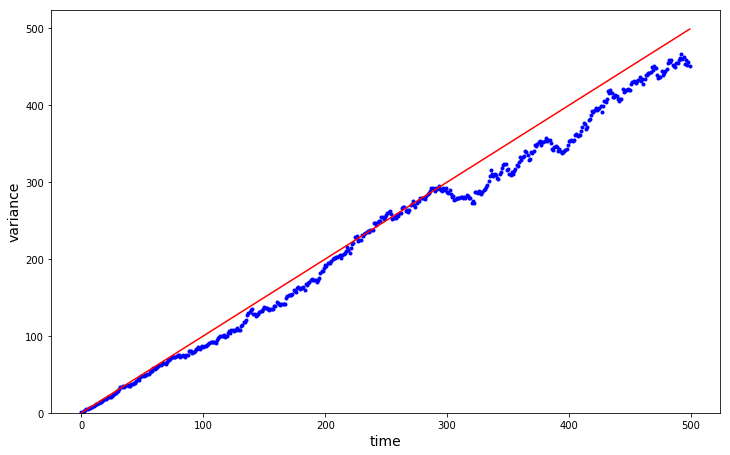

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, x.var(axis=1), 'b.')
_ = ax.plot(time, sigma*time, 'r-')
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('variance', fontsize=14)
ax.set_ylim(.0)
ax.set_xlabel('time', fontsize=14);


## Theory: AR(1) motion


In [5]:
time = np.arange(N_time)
x = np.cumsum( np.random.randn(N_time, N_trials) * sigma , axis=0) / np.sqrt(time[:, np.newaxis]+1)

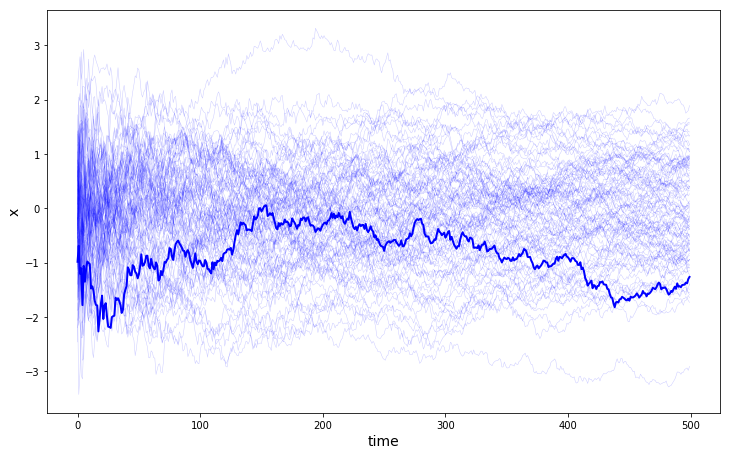

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, x, c='b', lw=.5, alpha=.2)
_ = ax.plot(time, x[:, i_sample], c='b', lw=2, alpha=1.)
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('x', fontsize=14)
#ax.set_ylim(-.05, 1.05)
ax.set_xlabel('time', fontsize=14);

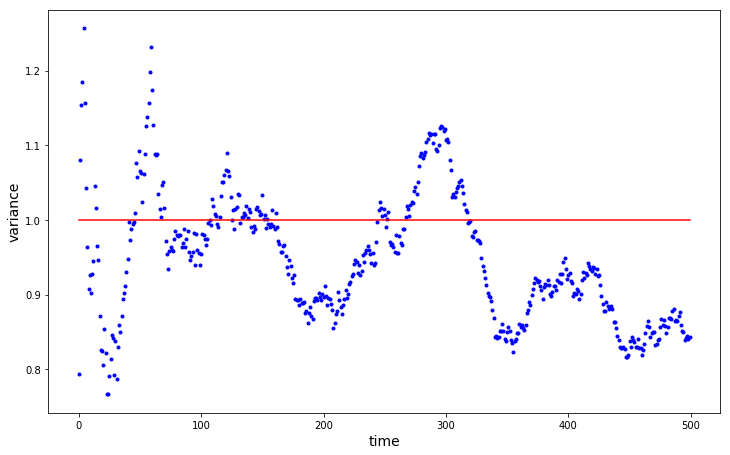

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, x.var(axis=1), 'b.')
_ = ax.plot(time, sigma**2/(1-(1/N_time)**2)*np.ones_like(time), 'r-')
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('variance', fontsize=14)
#ax.set_ylim(-.05, 1.05)
ax.set_xlabel('time', fontsize=14);



## Theory: AR(1) motion - usual definition



In [8]:
a, sigma = 1-2e-2, 1.

def AR1(N_time, N_trials, a, sigma):
    time = np.arange(N_time)
    x = np.sqrt(sigma**2/(1-a**2)) *  np.random.randn(N_time, N_trials)
    for i_time in time[1:]:
        x[i_time, :] = a*x[i_time-1, :] + sigma *  np.random.randn(1, N_trials)
    return (time, x)

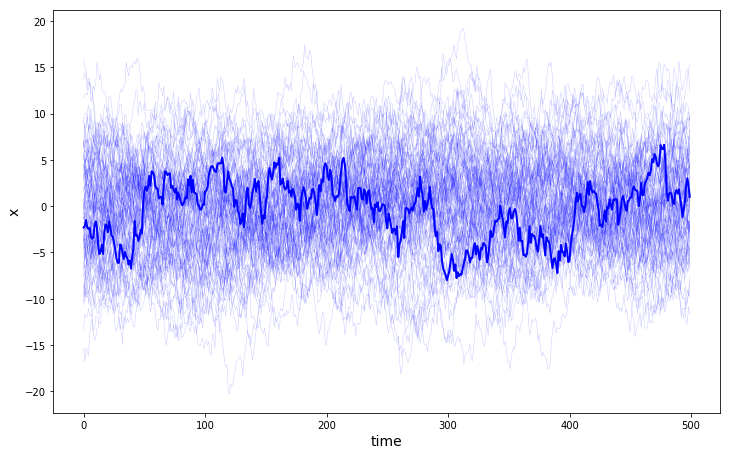

In [9]:
time, x = AR1(N_time, N_trials, a, sigma)
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, x, c='b', lw=.5, alpha=.2)
_ = ax.plot(time, x[:, i_sample], c='b', lw=2, alpha=1.)
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('x', fontsize=14)
#ax.set_ylim(-.05, 1.05)
ax.set_xlabel('time', fontsize=14);

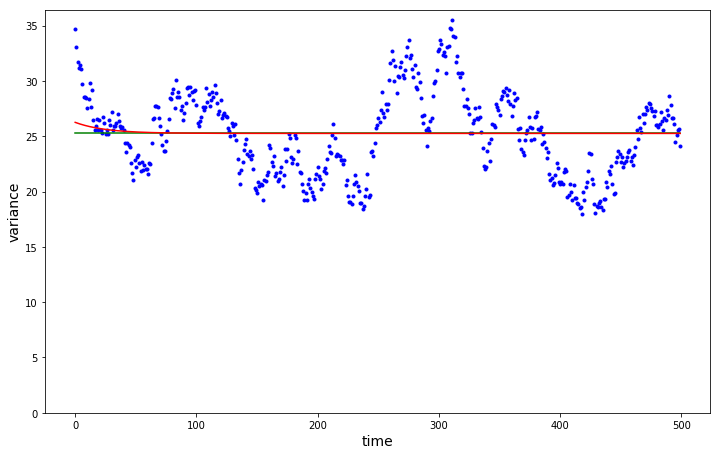

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, x.var(axis=1), 'b.')
_ = ax.plot(time, sigma**2/(1-a**2)*np.ones_like(time), 'g-')
_ = ax.plot(time, a**(2*time) + sigma**2/(1-a**2)*np.ones_like(time), 'r-')
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('variance', fontsize=14)
ax.set_ylim(0)
ax.set_xlabel('time', fontsize=14);

In [11]:
N_test = 15

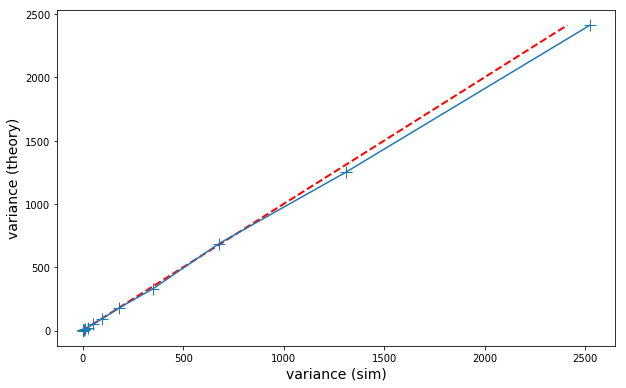

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))

sigmas = sigma*np.logspace(-1, 1, N_test)
var = np.zeros(N_test)
for i_test, sigma_ in enumerate(sigmas):
    time, x = AR1(N_time, N_trials, a, sigma_)
    var[i_test] = np.var(x)

_ = ax.plot(var, var, 'r--', lw=2)
_ = ax.plot(sigmas**2/(1-a**2), var, '-', marker='+', ms=12)
ax.axis('tight')
ax.set_ylabel('variance (theory)', fontsize=14)
ax.set_xlabel('variance (sim)', fontsize=14);

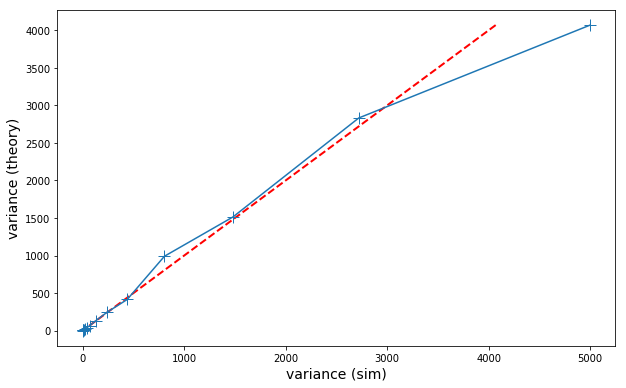

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))

a_s = 1 - np.logspace(-4, -.3, N_test)
var = np.zeros(N_test)
for i_test, a_ in enumerate(a_s):
    time, x = AR1(N_time, N_trials, a_, sigma)
    var[i_test] = np.var(x)

_ = ax.plot(var, var, 'r--', lw=2)
_ = ax.plot(sigma**2/(1-a_s**2), var, marker='+', ms=12)
ax.axis('tight')
ax.set_ylabel('variance (theory)', fontsize=14)
ax.set_xlabel('variance (sim)', fontsize=14);



## Theory: AR(1) motion - normalized definition


Variance attendue en régime stationnaire =
$$
\hat{\sigma}^2 = \frac{\sigma^2}{1-a^2}
$$

donc si on veut avoir $\hat{\sigma}$, on pose pour un $a$ donné
$$
\sigma  = \hat{\sigma} * \sqrt{1-a^2}
$$




In [14]:
np.random.seed(420)
a, sigma = 1-2e-2, 1.

def AR1_norm(N_time, N_trials, a, sigma):
    time = np.arange(N_time)
    sigma_eff = sigma * np.sqrt(1-a**2)
    x = sigma_eff *  np.random.randn(N_time, N_trials)
    for i_time in time[1:]:
        x[i_time, :] = a*x[i_time-1, :] + sigma_eff *  np.random.randn(1, N_trials)
    return (time, x)

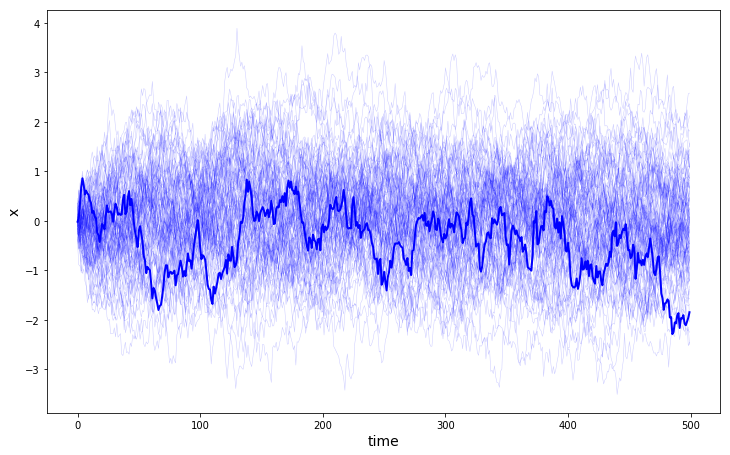

In [15]:
time, x = AR1_norm(N_time, N_trials, a, sigma)
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, x, c='b', lw=.5, alpha=.2)
_ = ax.plot(time, x[:, i_sample], c='b', lw=2, alpha=1.)
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('x', fontsize=14)
#ax.set_ylim(-.05, 1.05)
ax.set_xlabel('time', fontsize=14);

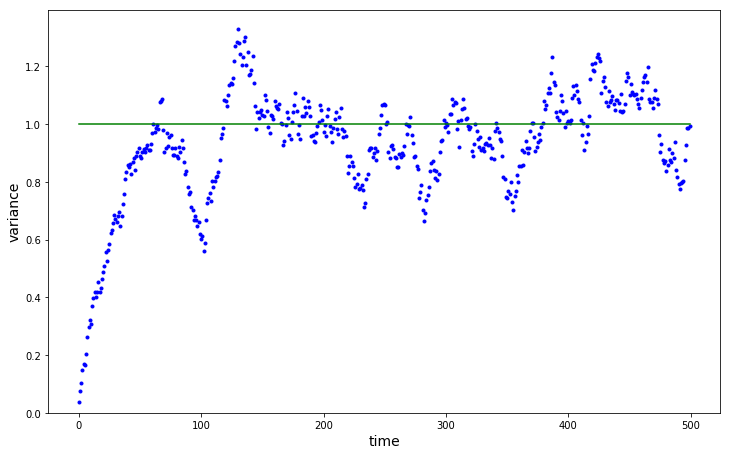

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, x.var(axis=1), 'b.')
_ = ax.plot(time, sigma**2*np.ones_like(time), 'g-')
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('variance', fontsize=14)
ax.set_ylim(0)
ax.set_xlabel('time', fontsize=14);

In [17]:
N_test = 15

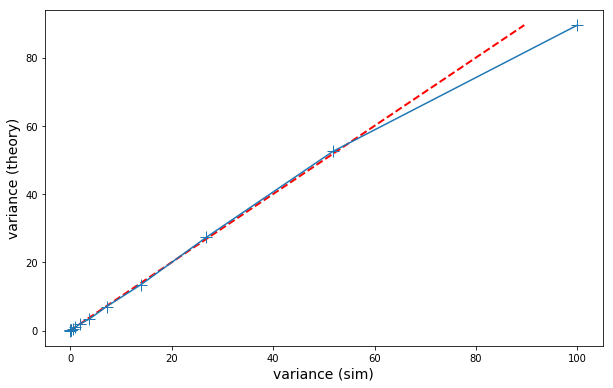

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))

sigmas = sigma*np.logspace(-1, 1, N_test)
var = np.zeros(N_test)
for i_test, sigma_ in enumerate(sigmas):
    time, x = AR1_norm(N_time, N_trials, a, sigma_)
    var[i_test] = np.var(x)

_ = ax.plot(var, var, 'r--', lw=2)
_ = ax.plot(sigmas**2, var, '-', marker='+', ms=12)
ax.axis('tight')
ax.set_ylabel('variance (theory)', fontsize=14)
ax.set_xlabel('variance (sim)', fontsize=14);



## Theory: binomial motion - restricting AR(1) to the [0, 1] interval


Since we know the variance of the resulting 



In [19]:
from scipy.special import erf
#np.lookfor('error function erf', module='scipy')

In [20]:
erf(-1/np.sqrt(2))

-0.6826894921370859

In [21]:
a, sigma = 1-2e-2, 1.

def binomial(N_time, N_trials, a, sigma):
    time = np.arange(N_time)
    sigma_eff = sigma * np.sqrt(1-a**2)
    x = sigma_eff *  np.random.randn(N_time, N_trials)
    for i_time in time[1:]:
        x[i_time, :] = a*x[i_time-1, :] + sigma_eff *  np.random.randn(1, N_trials)
    return (time, .5*erf(x/np.sqrt(2)) + .5 )

In [22]:
np.random.randint(N_trials)

59

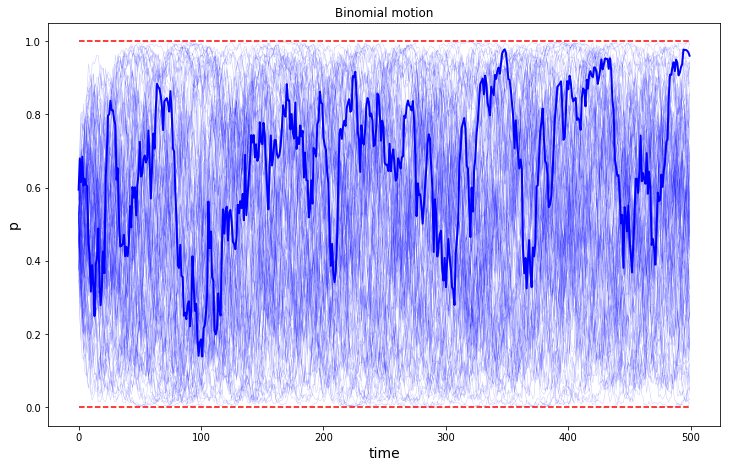

In [23]:
i_sample = np.random.randint(N_trials)
time, x = binomial(N_time, N_trials, a, sigma)
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, x, c='b', lw=.5, alpha=.2)
_ = ax.plot(time, np.zeros_like(time), 'r--')
_ = ax.plot(time, np.ones_like(time), 'r--')
_ = ax.plot(time, x[:, i_sample], c='b', lw=2, alpha=1.)
fig.tight_layout()
ax.axis('tight')
ax.set_title('Binomial motion')
ax.set_ylabel('p', fontsize=14)
#ax.set_ylim(-.05, 1.05)
ax.set_xlabel('time', fontsize=14);
plt.show()
#plt.savefig('../plots/Binomial_motion.png', bbox_inches='tight')

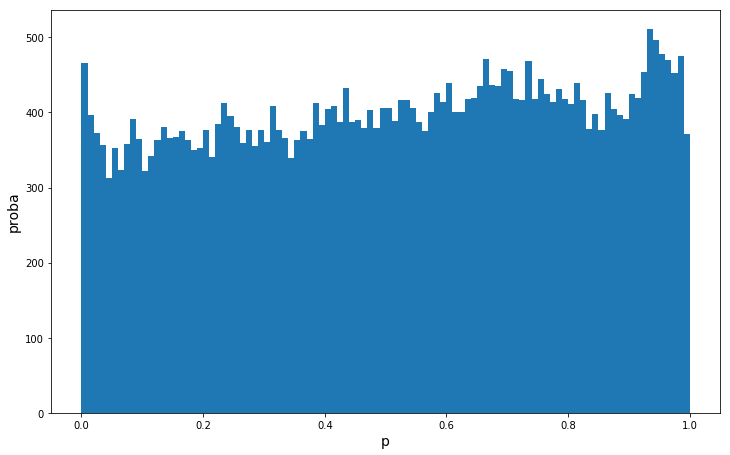

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.hist(x[100:, :].ravel(), 100)
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('proba', fontsize=14)
ax.set_ylim(0)
ax.set_xlabel('p', fontsize=14);